## Vital Elements of Calculus Series

# Part 11: The Hessian and multi-input Taylor Series

In this post we discuss higher order derivatives of a multi-input function, as well as the corresponding Taylor Series approximations.

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
import autograd.numpy as np
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

# 1. Higher order derivatives of multi-input functions

In this brief Section we describe higher order derivatives of multi-input functions.  These, like the first order derivatives, are expressed as a set of partial derivative functions.  Importantly, as we will see, the number of higher order partial derivatives grows exponentially in $N$, the number of function inputs.

## 1.1  Second order derivatives

In the previous post we described the collection of partial derivatives of a function $g$ taking in $N$ inputs

$$
\mathbf{w} = 
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_N
\end{bmatrix}
$$

known as the *gradient*.  Denoted as

$$
\nabla g(w_1, w_2, \ldots, w_N) = 
\begin{bmatrix}
\
\frac{\partial}{\partial w_1}g(w_1, w_2, \ldots, w_N) \\
\frac{\partial}{\partial w_2}g(w_1, w_2, \ldots, w_N) \\
\vdots \\
\frac{\partial}{\partial w_N}g(w_1, w_2, \ldots, w_N) 
\end{bmatrix}
$$

the gradient contains the $n^{th}$ partial derivative $\frac{\partial}{\partial w_n}g(w_1, w_2, \ldots, w_N)$ as its $n^{th}$ entry.  This partial derivative - like the original function itself - is a mathematical function taking in the $N$ inputs abbreviated $\mathbf{w}$.  Because of this we can differentiate the $n^{th}$ partial derivative along each input axis. For instance, we can take the $m^{th}$ partial derivative of  $\frac{\partial}{\partial w_n}g(w_1,w_2,..,w_N)$ as

$$
\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g(w_1, w_2, \ldots, w_N)
$$

This is a *second order derivative*.  How many of these does a function $g(\mathbf{w})$ taking in $N$ inputs have?  Well every one of $g$'s $N$ first order derivatives - each being a function of $N$ inputs - has $N$ partial derivatives.  This means that $g(\mathbf{w})$ has a total of $N^2$ second order derivatives.

> A function $g(\mathbf{w})$ taking in $N$ inputs has $N^2$ second order derivatives.

As with the notion of the gradient, this large set of second order derivatives are typically organized in a very particular way so that they can be more easily communicated and computed with.  The *Hessian* - which is written notationally as $\nabla^2 g(\mathbf{w})$ - is the $N\times N$ matrix of second order derivatives whose $(m,n)^{th}$ element is $\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g(\mathbf{w})$ or $\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g$ for short.  The full Hessian matrix is written as

$$
\nabla^2 g(\mathbf{w}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_2}g & \cdots & \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_N}g\\
\frac{\partial}{\partial w_2} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_2} \frac{\partial}{\partial w_2}g & \cdots & \frac{\partial}{\partial w_2} \frac{\partial}{\partial w_N}g\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial}{\partial w_N} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_N} \frac{\partial}{\partial w_2}g & \cdots & \frac{\partial}{\partial w_N} \frac{\partial}{\partial w_N}g\\
\end{bmatrix}
$$

Moreover since it is virtually always the case that
$\frac{\partial}{\partial w_m} \frac{\partial}{\partial w_n}g = \frac{\partial}{\partial w_n} \frac{\partial}{\partial w_m}g$, particularly with the sort of functions used in machine learning, *the Hessian is a symmetric matrix*.

> The Hessian is a symmetric $N\times N$ matrix of second order derivatives.

#### <span style="color:#a50e3e;">Example. </span>  The Hessian of $g(w_1,w_2) = w^2_1 + w^2_2$

In the Python cell below we plot the function $g(w_1,w_2) = w^2_1 + w^2_2$, along with its first and second derivatives in a binary tree whose structure reflects the fact that the number of derivatives grows exponentially with order.  Notice that the second order derivatives $ \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_2}g(w_1,w_2)$ and  $ \frac{\partial}{\partial w_2} \frac{\partial}{\partial w_1}g(w_1,w_2)$ have been plotted in the same panel, since they are the same function.

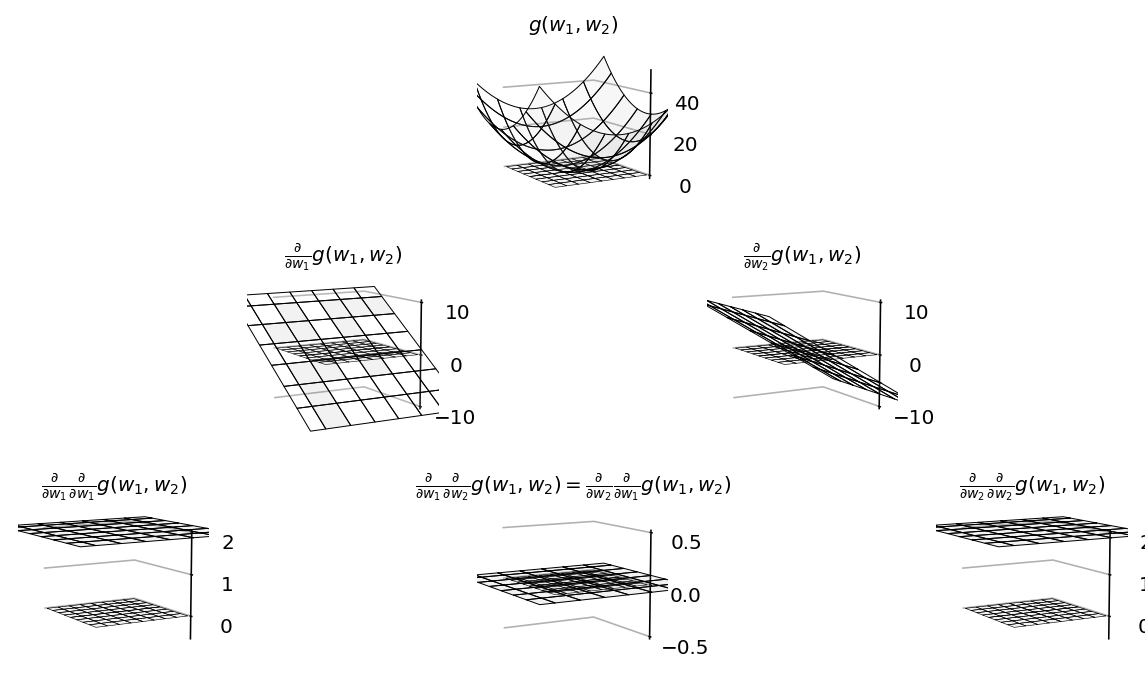

In [2]:
# define the function and viewing angle
func = lambda w: w[0]**2 + w[1]**2
view = [10,150]

# visualize function, first and second derivatives: note the renderer associated with %matplotlib notebook does not work well with this widget (tends to enlarge and center 3d images), use %config InlineBackend.figure_format = 'retina'
callib.derivative_tree.draw_it(func = func,view = view)

One can verify that these derivatives take the algebraic form

$$
\nabla g(w_1,w_2) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1}g(w_1,w_2) \\
\frac{\partial}{\partial w_2}g(w_1,w_2) \\
\end{bmatrix}
= 
\begin{bmatrix}
2w_1 \\
2w_2 \\
\end{bmatrix}
$$

and 

$$
\nabla^2 g(\mathbf{w}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1} \frac{\partial}{\partial w_1}g& \frac{\partial}{\partial w_1} \frac{\partial}{\partial w_2}g\\
\frac{\partial}{\partial w_2} \frac{\partial}{\partial w_1}g&
\frac{\partial}{\partial w_2} \frac{\partial}{\partial w_2}g 
\end{bmatrix}
 = 
 \begin{bmatrix}
 2 \,\,\, 0 \\
 0 \,\,\, 2 
 \end{bmatrix}
$$

## 1.2  Higher order derivatives

In general the number of partial derivatives of a multi-input function grows *exponentially* with the order.  We have just seen that a function taking in $N$ inputs has $N^2$ second order derivatives.  In general such a function has $N^D$ partial derivatives of order $D$ (note this accounts for the case of first order derivatives, when $D=1$, as well).  

> A function of $N$ inputs has $N^D$ partial derivatives of order $D$.



# 2.  Taylor Series of multi-input functions

We have already seen Taylor Series for single-input functions, as well as the first order Taylor Series approximation for multi-input functions - this was the tangent hyperplane that partial derivatives define at each point of a multi-input function.  In this Section we fill out the remainder of the Taylor Series story for multi-input functions, paying special attention to second order approximations.

## 2.1  First order approximation

In our first post on Taylor Series - for single input functions - we saw how the general Taylor Series approximation can be thought of as a natural extension of the tangent line for higher degree polynomial approximations.  The story with multi-input functions is precisely the same. 

If we asked what sort of degree one polynomial $h(\mathbf{w})$ matched a function $g(\mathbf{w})$ at a point $\mathbf{w}^0$ in terms of both its function and gradient value there, i.e.,

\begin{array}
\
1. \,\,\, h\left(\mathbf{w}^0\right) = g\left(\mathbf{w}^0\right) \\
2. \,\,\, \nabla h\left(\mathbf{w}^0\right) = \nabla g\left(\mathbf{w}^0\right) \\
\end{array}

we could setup a system of equations (mirroring the one we setup when asking the analogous question for single-input functions) and recover the tangent hyperplane (our first order Taylor Series approximation)

$$
h(\mathbf{w}^0) = g(\mathbf{w}^0) + \nabla g(\mathbf{w}^0)^T(\mathbf{w} - \mathbf{w}^0)
$$

Notice how this is the exact analog of the first order approximation for single-input functions, and reduces to it (a tangent line) when $N = 1$.

In the next Python cell we plot the first order Taylor Series approximation - shown in lime green - to the function $g(w_0,w_1) = \text{sin}(w_0)$ at a point.

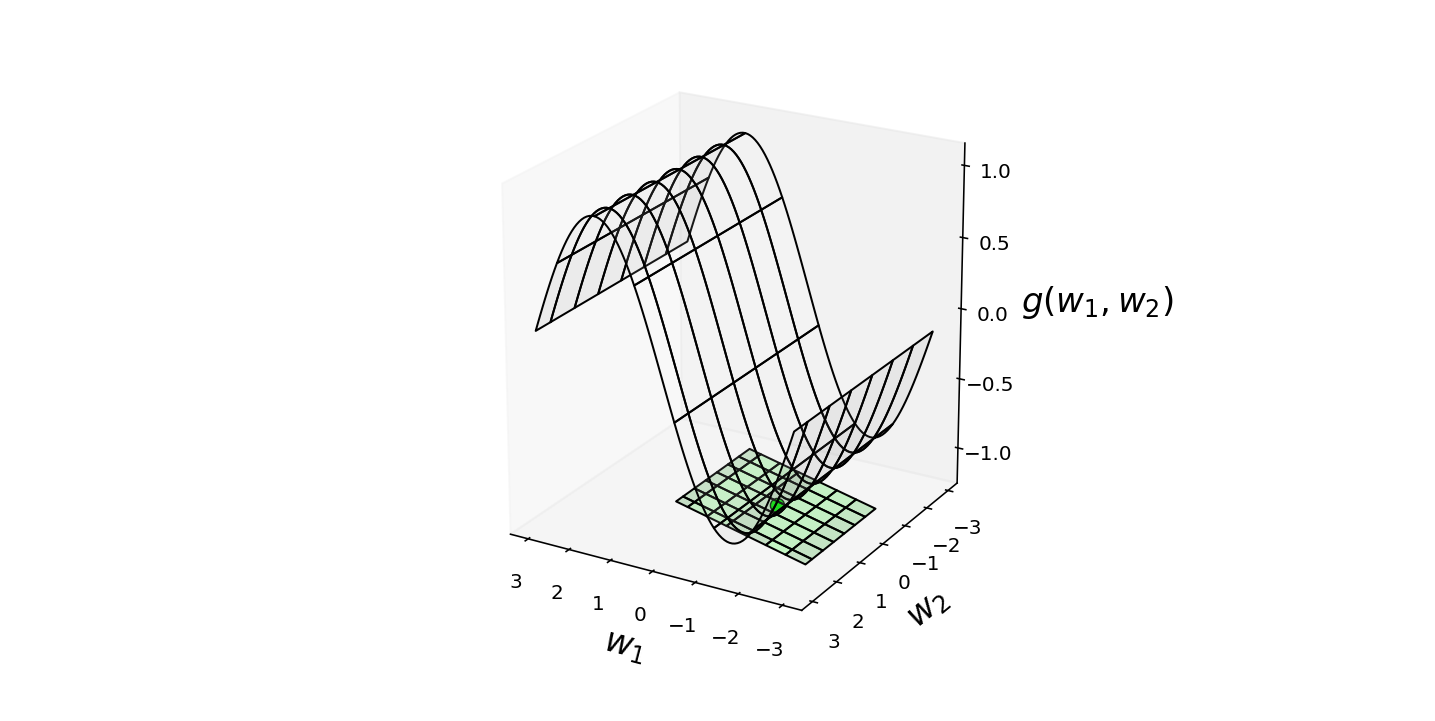

In [3]:
# create a function and point to compute approximation
g = lambda w: np.sin(w[0])
w_val = [-1.5,1]
view = [20,120]

# load in function to examine
viz = callib.taylor3d_viz.visualizer(g = g)

# start examination
viz.draw_it(w_val = w_val,view = view,first_order = True);

## 2.2  Second order approximation

Likewise, inquiring about what sort of degree two (quadratic) function $h$ could match $g$ at a point $\mathbf{w}^0$ in terms of the value it takes, as well as the values its first and second derivatives take, i.e.,

\begin{array}
\
1. \,\,\, h\left(\mathbf{w}^0\right) = g\left(\mathbf{w}^0\right) \\
2. \,\,\, \nabla h\left(\mathbf{w}^0\right) = \nabla g\left(\mathbf{w}^0\right) \\
3. \,\,\, \nabla^2 h\left(\mathbf{w}^0\right) = \nabla^2 g\left(\mathbf{w}^0\right) \\
\end{array}

we would likewise derive (as we did explicitly with the single-input case) the second order Taylor Series approximation


$$
h(\mathbf{w}) = g(\mathbf{w}^0) + \nabla g(\mathbf{w}^0)^T(\mathbf{w} - \mathbf{w}^0) + \frac{1}{2}(\mathbf{w} - \mathbf{w}^0)^T \nabla^2 g\left(\mathbf{w}^0\right) (\mathbf{w} - \mathbf{w}^0)
$$

Notice once again how this is the exact analog of the first order approximation for single-input functions, and reduces to it (a tangent quadratic) when $N = 1$.  Also note how this approximator is indeed a multi-input quadratic function (centered at $\mathbf{w}^0$), described in detail in the previous post.  

This is perhaps easier to see if we make a few substitutions and rearrange the terms.  Briefly denoting 
$\mathbf{A} = \frac{1}{2}\nabla^2 g\left(\mathbf{w}^0\right)$, $\mathbf{b} = \nabla g(\mathbf{w}^0)$, and $c =  g(\mathbf{w}^0)$ we can rewrite the above equivalently as

$$
g(\mathbf{w}) = \left(\mathbf{w} - \mathbf{w}^0\right)^T \mathbf{A} \left(\mathbf{w} - \mathbf{w}^0\right) + \mathbf{b}^T \left(\mathbf{w} - \mathbf{w}^0\right) + c
$$

In any case the fact that the second order Taylor Series approximation is a multi-input quadratic means (among other things) that - for example - the general shape it takes on at a given point (its convexity or concavity along each input dimension) is entirely determined by the eigenvalues of $\nabla ^2 g\left(\mathbf{w}^0\right)$.

In the next Python cell we plot the first and second order Taylor Series approximation - shown in lime green and torquoise respectively - to the function $g(w_0,w_1) = \text{sin}(w_0)$ at a point.  As was the case with single-input functions the second order approximation is a much better local approximator than the first, as it contains more derivative information there.

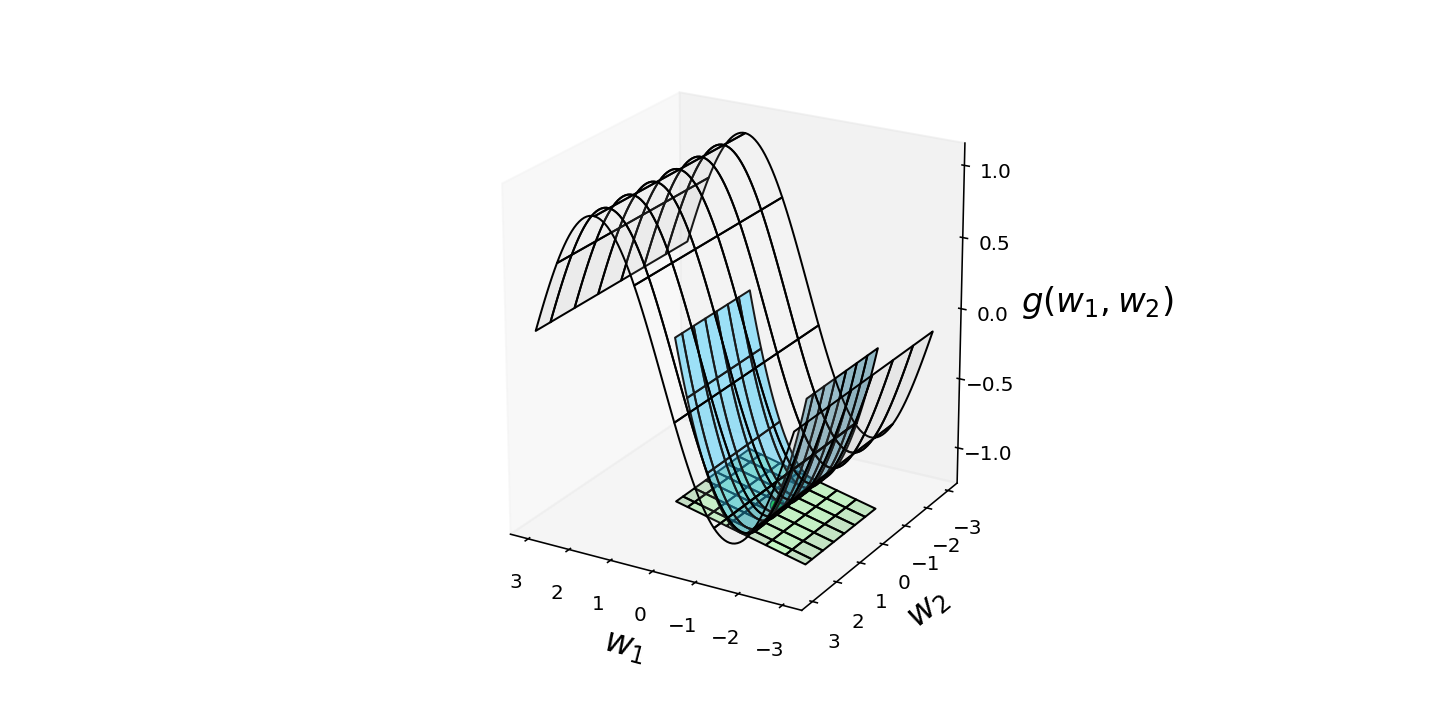

In [4]:
# create a function and point to compute approximation
g = lambda w: np.sin(w[0])
w_val = [-1.5,1]
view = [20,120]

# load in function to examine
viz = callib.taylor3d_viz.visualizer(g = g)

# start examination
viz.draw_it(w_val = w_val,view = view,first_order = True, second_order = True);

## 2.3  Higher order approximations

Higher order Taylor Series approximations can be defined precisely as in the single-input case.  The main difference with multi-input functions is that higher order  approximations - starting with the third order derivative - require serious manipulation of tensors of partial derivatives.

Again this can be readily defined, but practically speaking only approximations up to the second order are ever used in practice.  This is because - as we saw in the previous Section - the number of partial derivatives grows *exponentially* in the order of a derivative.   Thus even though we get a better (local) approximator as we increase the order of a Taylor series, the serious pitfall of calculating/storing exponentially many partial derivatives nullifies the benefit.